In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("evgeni_set.csv")
df

,minf,age,man,female,SmokingAlcoholism,Fatness,Diabetes,Hyperlipidemia,PhysicalInactivity,ArterialHypertension
0,0,65,0,1,0,0,0,0,0,1
1,0,69,0,1,0,0,0,0,0,1
2,0,61,1,0,0,0,0,0,1,1
3,0,64,0,1,0,0,0,0,1,1
4,0,62,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4041,0,43,0,1,0,0,0,0,0,0
4042,0,92,0,1,0,0,0,0,0,1
4043,0,88,0,1,0,0,0,0,0,1
4044,0,86,0,1,0,0,0,0,0,1


Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
поэтому разделю вручную и соеденю после деления обратно

In [3]:
df['age'] = df['age']/100
df_heartattack_x = df[df['minf']==1].iloc[:, 1:]
df_heartattack_y = df[df['minf']==1].iloc[:, 0]
df_no_heartattack_x = df[df['minf']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['minf']==0].iloc[:, 0]

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

In [5]:
df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

In [6]:
x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)
if all(y_test.index==x_test.index) and all(y_train.index==x_train.index):
    print('Данные склеены правильно')

Данные склеены правильно


In [7]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[789,   0],
       [ 21,   0]], dtype=int64)

In [8]:
y_pred[y_pred==1]

array([], dtype=int64)

Скорее всего подпространство данных 1 часто пересекаются подпространством данных 0

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=130, random_state=100)
x_tsne = tsne.fit_transform(df.iloc[:, 1:])

e:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


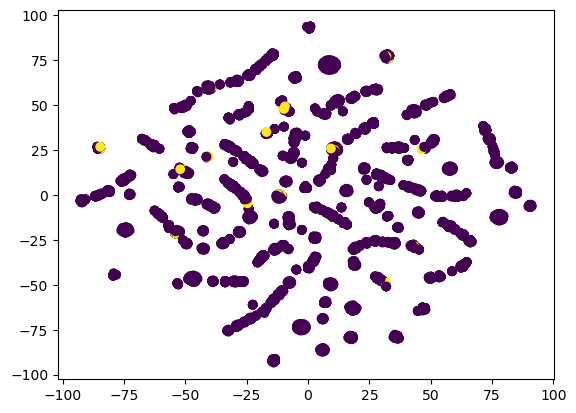

In [10]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=df.iloc[:, 0])

In [106]:
from sklearn.metrics import recall_score, f1_score, precision_score
prediction = lr.predict_proba(x_test)

In [107]:
from tqdm import tqdm

results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()

for i in tqdm(iters[:40]):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    results['threshold'].append(i)
    results['test_recall_score'].append(recall_score(y_test, predict_mine))
    results['test_f1_score'].append(f1_score(y_test, predict_mine))
    results['test_precision_score'].append(precision_score(y_test, predict_mine))


100%|██████████| 40/40 [00:00<00:00, 128.07it/s]


In [108]:
df_results = pd.DataFrame(results)
df_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.002698,1.0,0.050602,0.025958
1,0.002838,1.0,0.050725,0.026022
2,0.002838,1.0,0.050725,0.026022
3,0.002935,1.0,0.050847,0.026087
4,0.002935,1.0,0.050847,0.026087
5,0.002960,1.0,0.050909,0.026119
6,0.003271,1.0,0.051095,0.026217
7,0.003271,1.0,0.051095,0.026217
8,0.003271,1.0,0.051095,0.026217
9,0.003327,1.0,0.051345,0.026349


In [109]:
df_results.iloc[-1]

threshold               0.004071
test_recall_score       1.000000
test_f1_score           0.053503
test_precision_score    0.027487
Name: 39, dtype: float64